## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 6 is due on 3/24/2025

#Visualization in Python

Load up the `GSSvocab.csv` dataset into a pandas dataframe and drop the rows with missing values.

In [1]:
import pandas as pd

df = pd.read_csv("GSSvocab.csv")

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27360 entries, 0 to 27359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        27360 non-null  int64 
 1   gender      27360 non-null  object
 2   nativeBorn  27360 non-null  object
 3   ageGroup    27360 non-null  object
 4   educGroup   27360 non-null  object
 5   vocab       27360 non-null  int64 
 6   age         27360 non-null  int64 
 7   educ        27360 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.7+ MB


What is the data type of each variable? What do you think is the response variable the collectors of this data had in mind?

Answer: The variables are of two possible data types. The year, vocab, age, and educ variables are stored as int64. The gender, nativeborn, ageGroup, and educGroup variables are objects. I think that the response variable is the vocab as the study is set to observe the amount of vocabulary words known by the participants. 

Create two different plots and identify the best-looking plot you can to examine the `age` variable. Save the best looking plot as an appropriately-named PDF.

Using plotnine

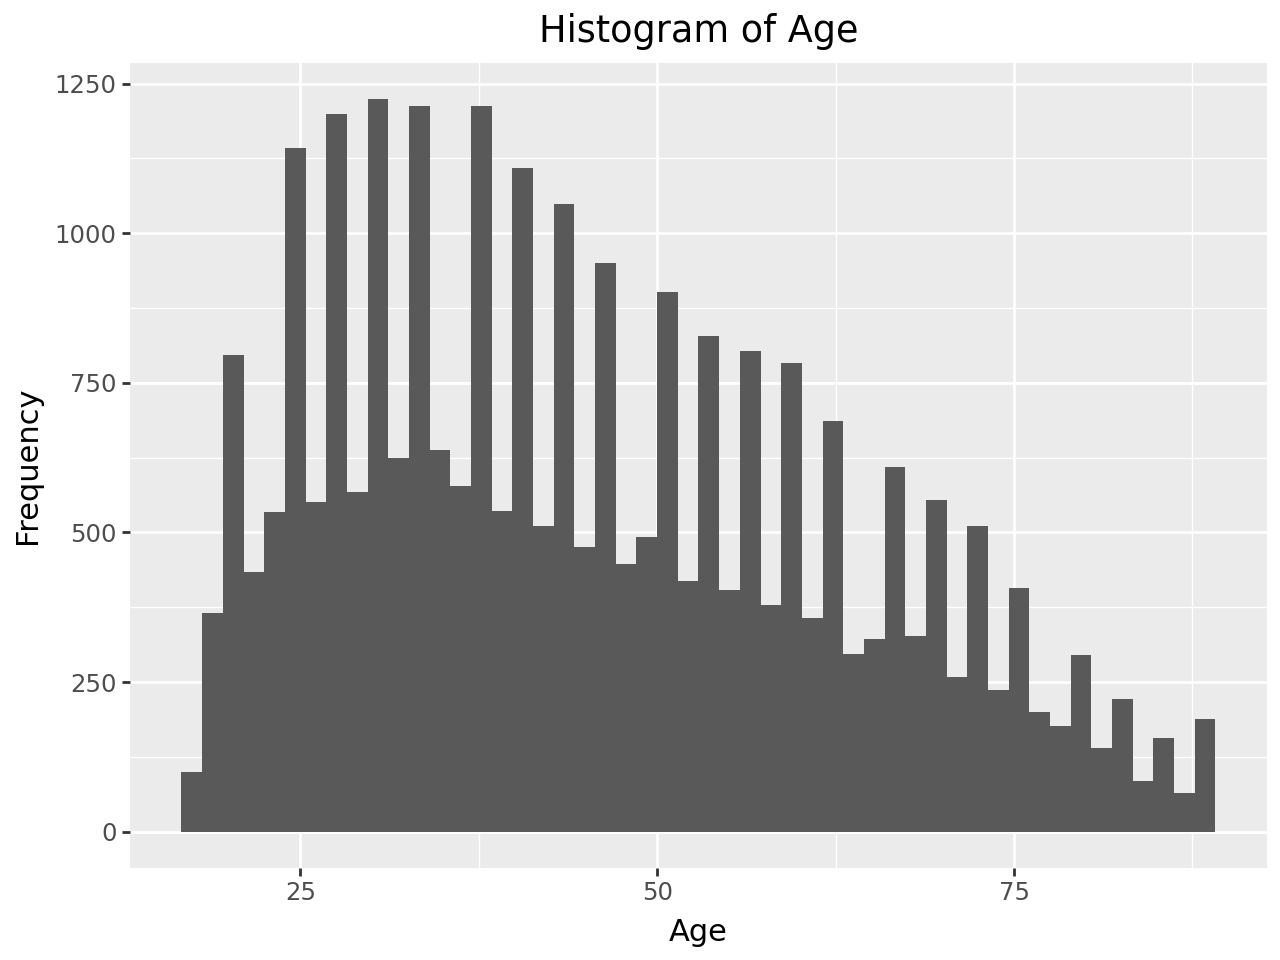

In [2]:
from plotnine import ggplot, aes, geom_histogram, geom_density, labs, ggsave

# Plot 1: Histogram of age with 50 bins
hist_plot = (
    ggplot(df, aes(x='age')) +
    geom_histogram(bins=50) +
    labs(x='Age', y='Frequency', title='Histogram of Age')
)

# Plot 2: Density plot of age with blue fill
density_plot = (
    ggplot(df, aes(x='age')) +
    geom_density(fill='blue') +
    labs(x='Age', title='Density Plot of Age')
)

# Display the plots (if using an interactive environment, they will be rendered)
hist_plot

Display second plot

In [3]:
density_plot

Save the best one

In [4]:
density_plot.save(filename='density_plot_age.png')

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: density_plot_age.png


Using Seaborn and Matplotlib

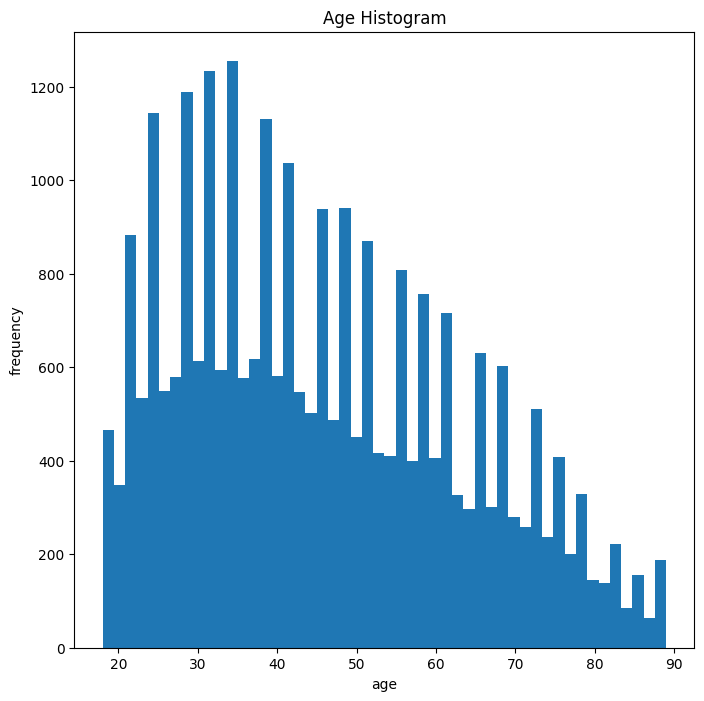

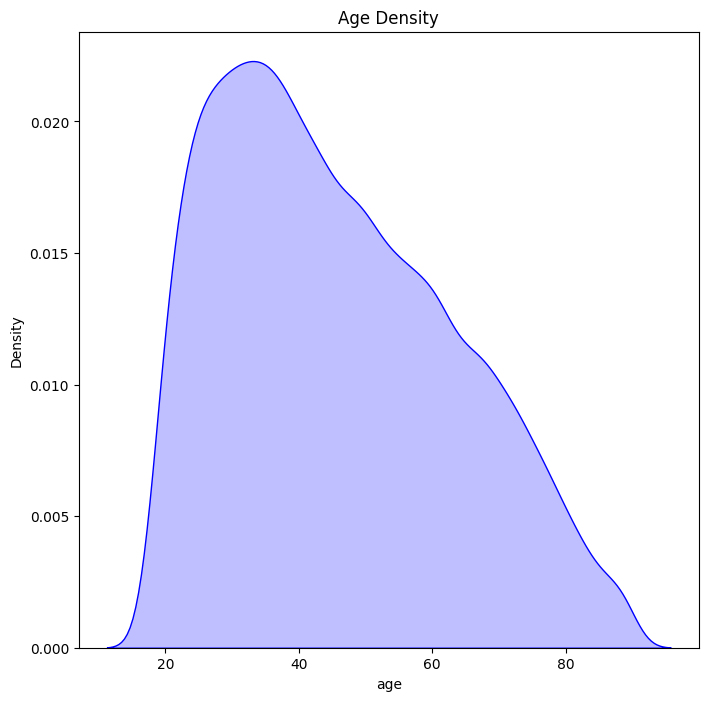

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
plt.hist(df["age"], bins=50)
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("Age Histogram")
plt.show()

plt.figure(figsize=(8,8))
sns.kdeplot(data=df, x="age", fill=True, color="blue")
plt.xlabel("age")
plt.title("Age Density")
plt.savefig("seaborn_density.pdf")
plt.show()

We will use plotninem (https://plotnine.org/) as our visualization tool for the first half of this lab. Create two different plots and identify the best looking plot you can to examine the `vocab` variable. Save the best looking plot as an appropriately-named PDF.

In [6]:
from plotnine import ggplot, aes, geom_bar, geom_point, labs, theme_minimal, ggsave, position_jitter

# Assume df is your GSSvocab DataFrame
# Ensure that vocab is treated as a categorical variable
df["vocab"] = df["vocab"].astype("category")

# ---- Plot 1: Bar Plot ----
bar_plot = (ggplot(df, aes(x='vocab')) +
    geom_bar(fill='blue') +
    labs(x='vocab', y='count', title='Vocab Bar Chart'))


# Display the plots (in an interactive environment, these will render)
bar_plot.save(filename='bar_plot', width=10, height=6, units='in', dpi=300)
bar_plot

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 10 x 6 in image.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: bar_plot


In [7]:
# Create a jitter plot for 'vocab'

# ---- Plot 2: Jitter Plot ----
jitter_plot = (ggplot(df, aes(x='vocab', y=0)) +
    geom_point(color='blue', size=1, position = position_jitter(width=0.05, height=0.01)) +
    labs(x='vocab', title='Vocab Jitter Plot'))

jitter_plot

Create the best-looking plot you can to examine the `ageGroup` variable by `gender`. Does there appear to be an association? There are many ways to do this.

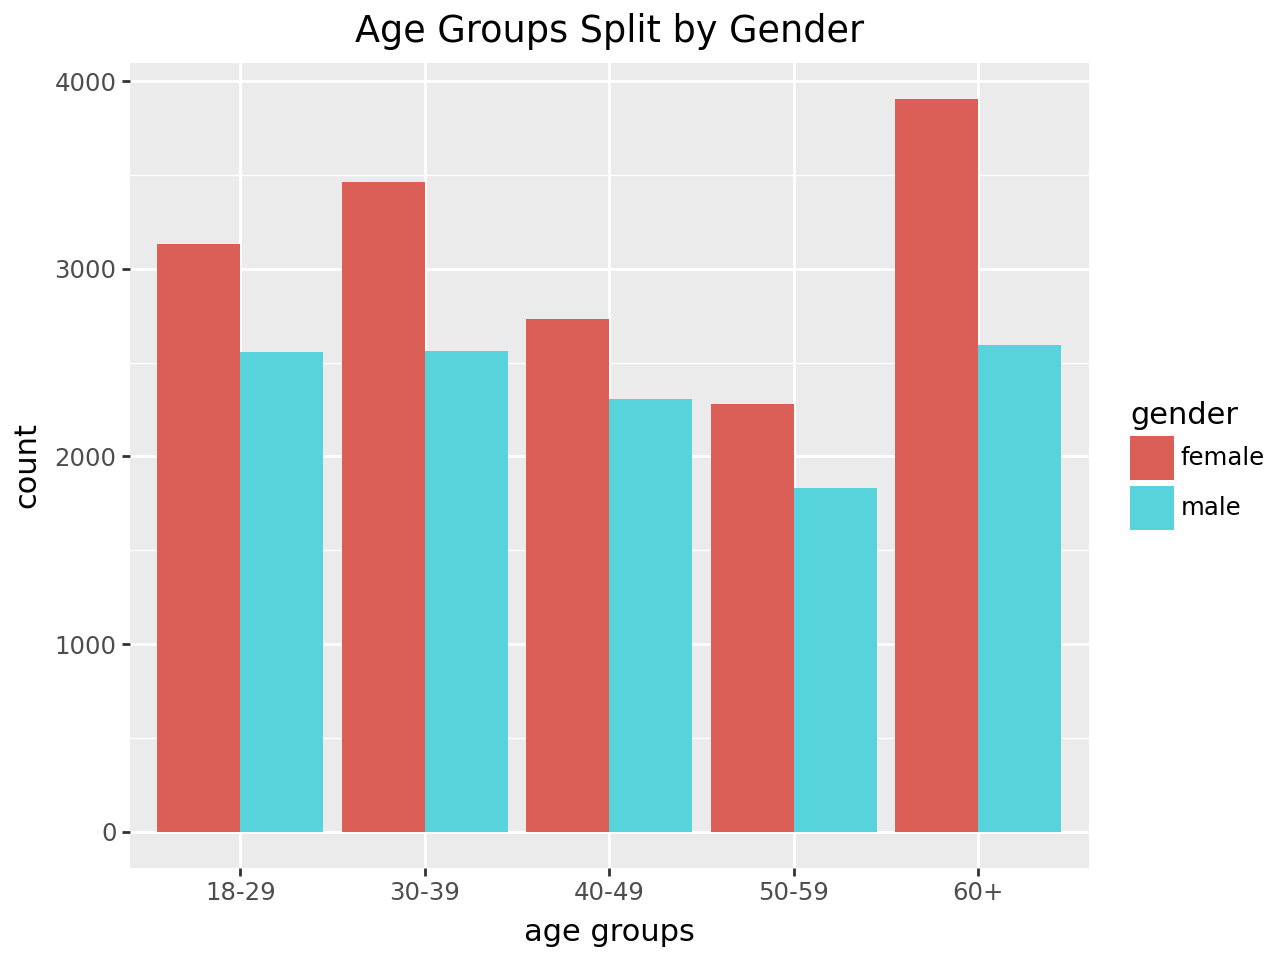

In [8]:
import pandas as pd
from plotnine import ggplot, aes, geom_violin, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'.
# Make sure 'gender' is treated as a categorical variable:
df['gender'] = df['gender'].astype('category')

bar_plot = (ggplot(df, aes(x='ageGroup', fill='gender')) +
    geom_bar(position='dodge') +
    labs(x='age groups', title='Age Groups Split by Gender'))

bar_plot

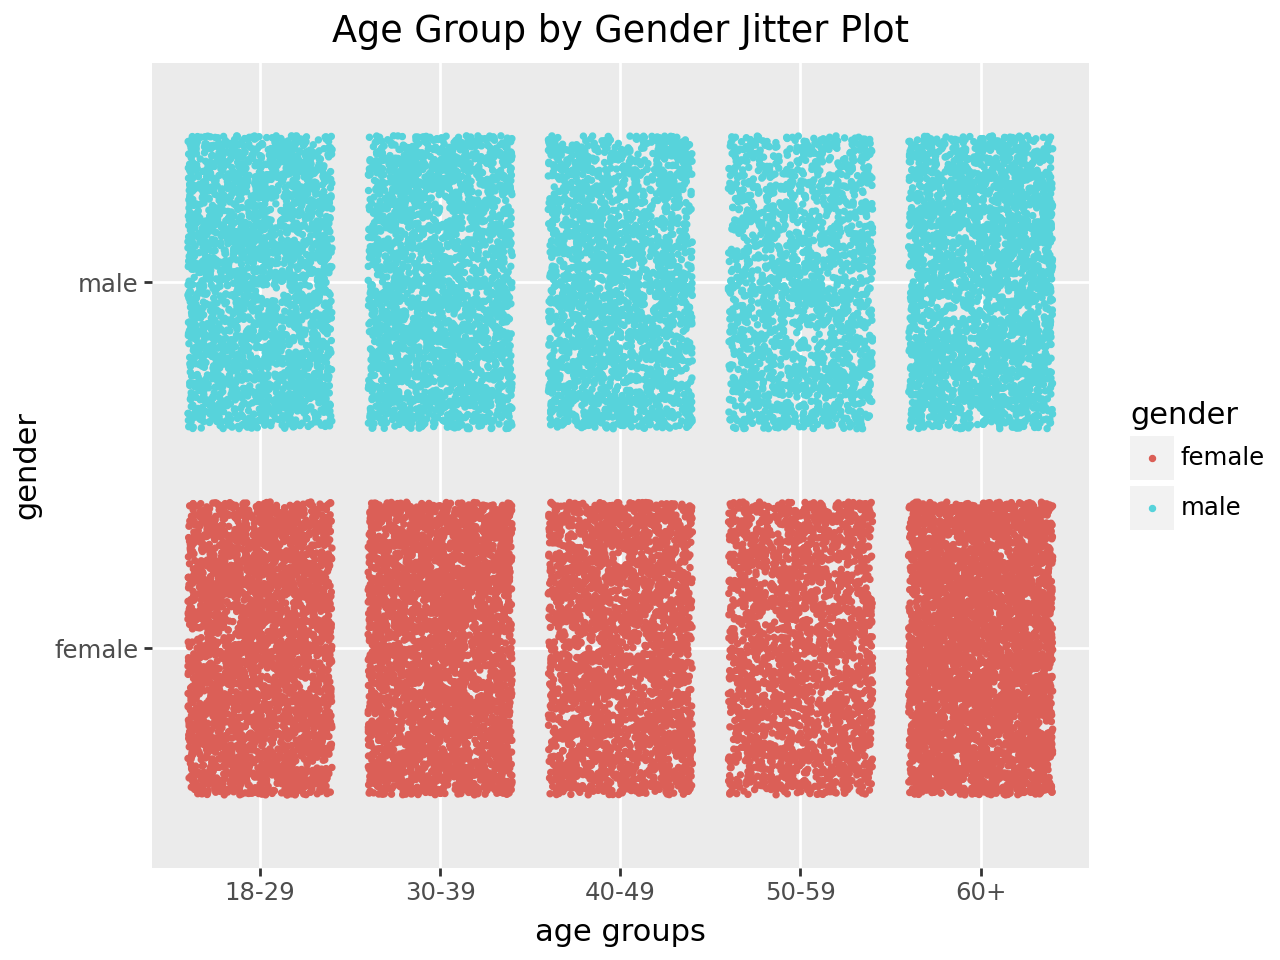

In [9]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'
# Ensure 'gender' is treated as a categorical variable
df['gender'] = df['gender'].astype('category')

jitter_plot = (ggplot(df, aes(x='ageGroup', y='gender', color='gender')) +
    geom_jitter(size=0.5) +
    labs(x='age groups', title='Age Group by Gender Jitter Plot'))

jitter_plot

Create the best-looking plot you can to examine the `vocab` variable by `age`. Does there appear to be an association?

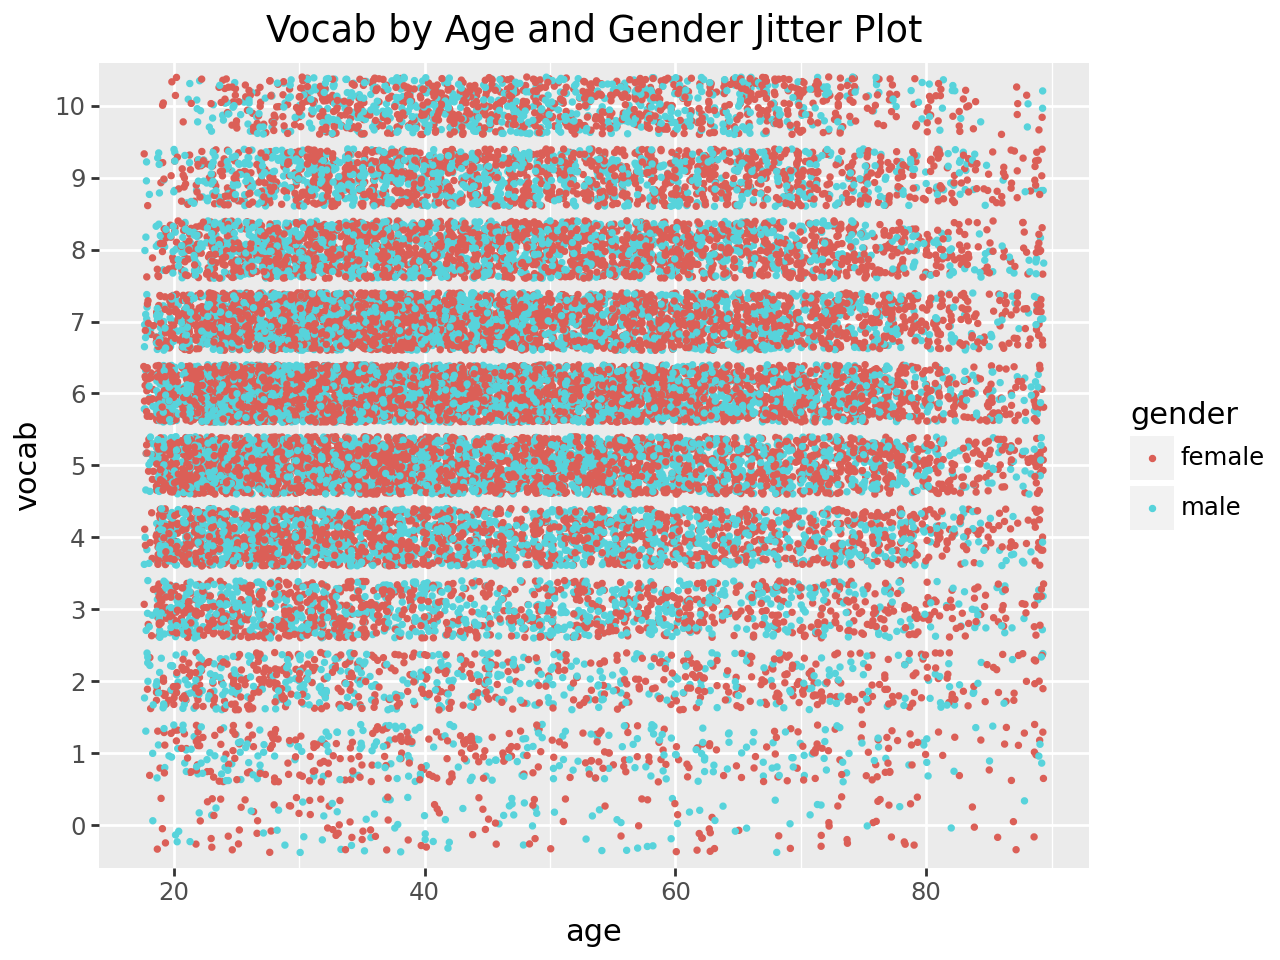

In [10]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

# Create a jitter plot to examine the relationship between age and vocab
plot = (ggplot(df, aes(x='age', y='vocab', color='gender')) +
    geom_jitter(size=0.5) +
    labs(x='age', title='Vocab by Age and Gender Jitter Plot'))

plot


Add an estimate of $f(x)$ using the smoothing geometry to the previous plot. Does there appear to be an association now? First install pygam by uncommenting and running the cell below and then fill in the missing block in the subsequent cell.

In [11]:
#pip install pygam

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 16790 rows containing missing values.


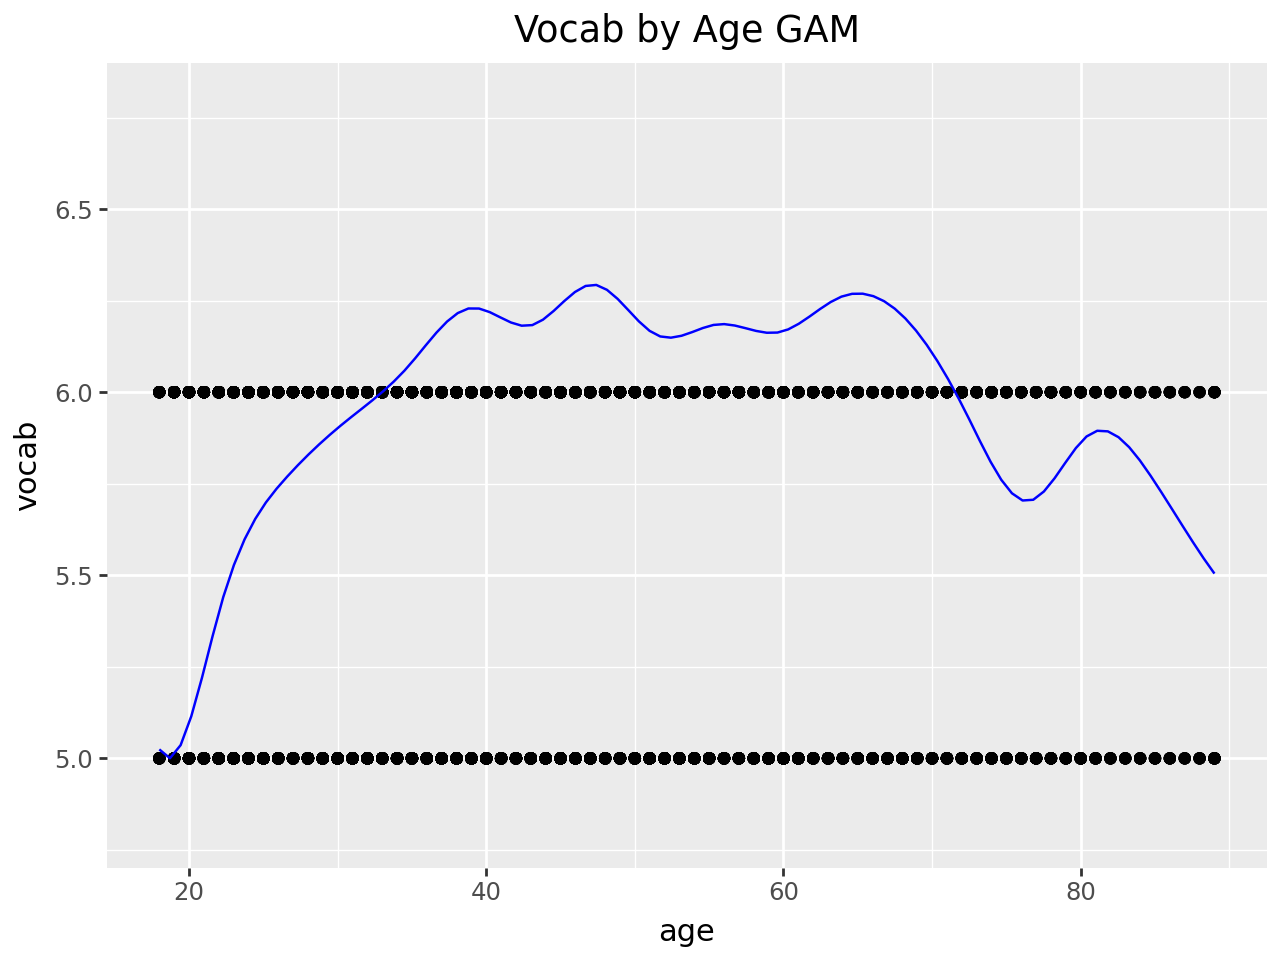

In [12]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, scale_y_continuous

# Assume df is your DataFrame with 'age' and 'vocab' columns.
# Ensure 'vocab' is numeric (if it's not already)
df['vocab'] = pd.to_numeric(df['vocab'], errors='coerce')

# Fit a GAM model for vocab ~ s(age)
X = df[['age']].values  
y = df['vocab'].values
gam = LinearGAM(s(0)).fit(X, y)

# Create a grid of age values for prediction
age_grid = np.linspace(df['age'].min(), df['age'].max(), 100)
gam_preds = gam.predict(age_grid)

# Create a DataFrame with the predictions
gam_df = pd.DataFrame({
    'age': age_grid,
    'vocab': gam_preds
})

# Create the plot with y-axis limits between 4.8 and 6.8
plot = (ggplot(df, aes(x='age', y='vocab')) +
    geom_point(alpha=0.5) +
    geom_line(data=gam_df, mapping=aes(x='age', y='vocab'), color='blue') +
    labs(x='age', y='vocab', title='Vocab by Age GAM') +
    scale_y_continuous(limits=(4.8, 6.8))
)

plot


Using the plot from the previous question, create the best looking plot overloading with variable `gender`. Does there appear to be an interaction of `gender` and `age`?

In [13]:
from plotnine import ggplot, aes, geom_jitter, geom_smooth, labs, theme_minimal

# Assume df is your DataFrame containing 'age', 'vocab', and 'gender'
# For example, df = pd.read_csv("GSSvocab.csv")

plot = (ggplot(df, aes(x='age', y='vocab')) +
    geom_jitter(aes(color='gender'), width=0.2, height=0.2)+
    geom_line(data=gam_df, mapping=aes(x='age', y='vocab'), color='black') +
    labs(x='age', y='vocab', title='Vocab By Age and Gender Jitter Plot')
)

plot

Using the plot from the previous question, create the best looking plot overloading with variable `nativeBorn`. Does there appear to be an interaction of `nativeBorn` and `age`?

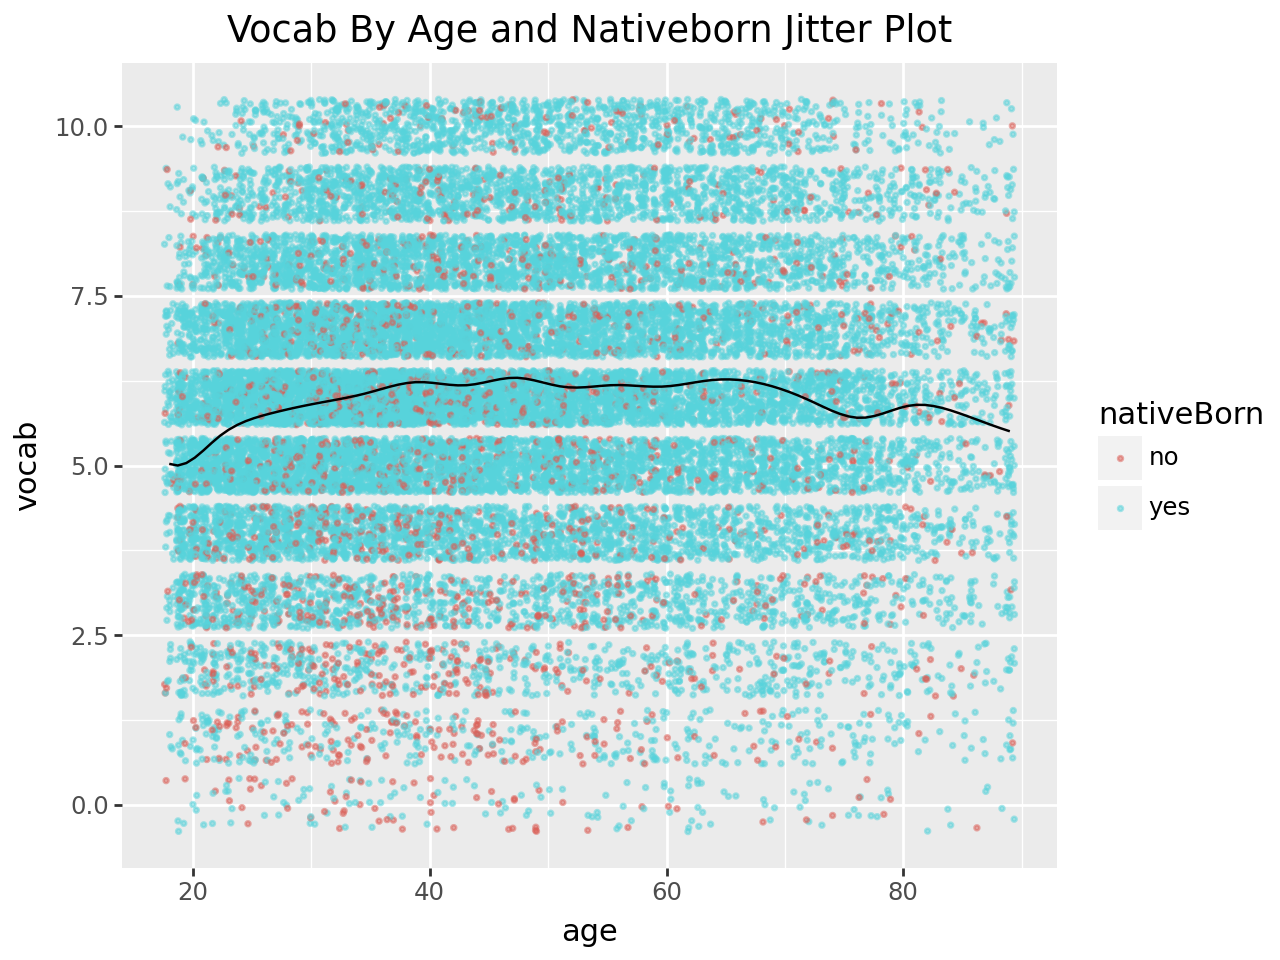

In [14]:
from plotnine import ggplot, aes, geom_jitter, geom_smooth, labs, theme_minimal

# Assume df is your GSSvocab DataFrame containing 'age', 'vocab', and 'nativeBorn'
plot = (ggplot(df, aes(x='age', y='vocab')) +
    geom_jitter(aes(color='nativeBorn'), size=0.5, alpha=0.5)+
    geom_line(data=gam_df, mapping=aes(x='age', y='vocab'), color='black') +
    labs(x='age', y='vocab', title='Vocab By Age and Nativeborn Jitter Plot')
)

plot


Create two different plots and identify the best-looking plot you can to examine the `vocab` variable by `educGroup`. Does there appear to be an association?

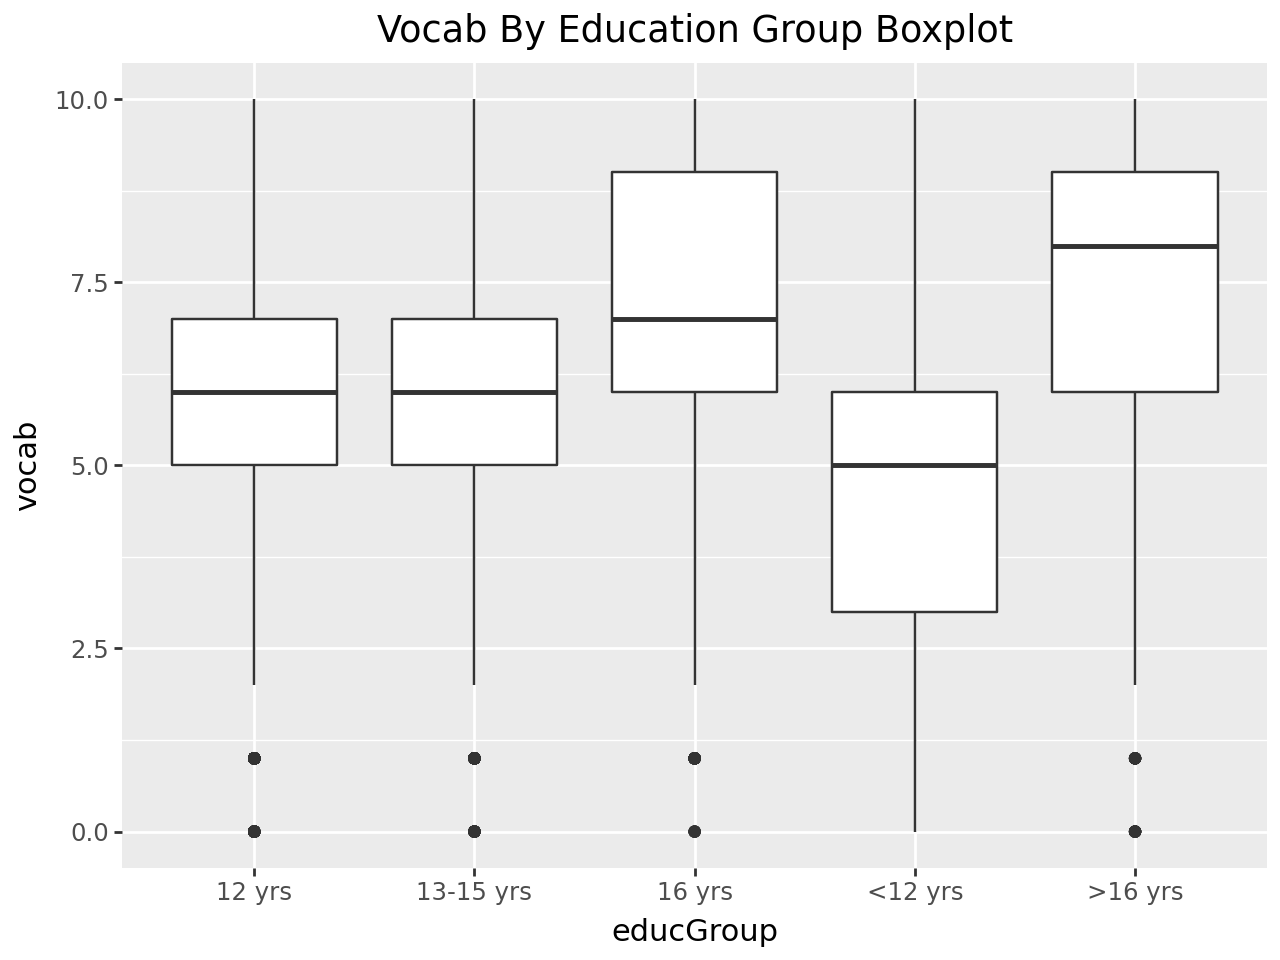

In [15]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_density, labs, theme_minimal

# Assume df is your GSSvocab DataFrame containing the columns 'vocab' and 'educGroup'
# Ensure that 'educGroup' is treated as a categorical variable
df['educGroup'] = df['educGroup'].astype('category')

# ---- Plot 1: Boxplot of vocab by educGroup ----
boxplot = (ggplot(df, aes(x='educGroup', y='vocab')) +
           geom_boxplot() +
           labs(title='Vocab By Education Group Boxplot'))
          
boxplot


In [16]:
# ---- Plot 2: Density Plot of vocab with fill by educGroup ----
density_plot = (ggplot(df, aes(x='vocab', fill='educGroup')) +
    geom_density(adjust=2, alpha=0.5)+
    labs(title='Vocab By Education Group'))

density_plot

Using the best-looking plot from the previous question, create the best looking overloading with variable `gender`. Does there appear to be an interaction of `gender` and `educGroup`?

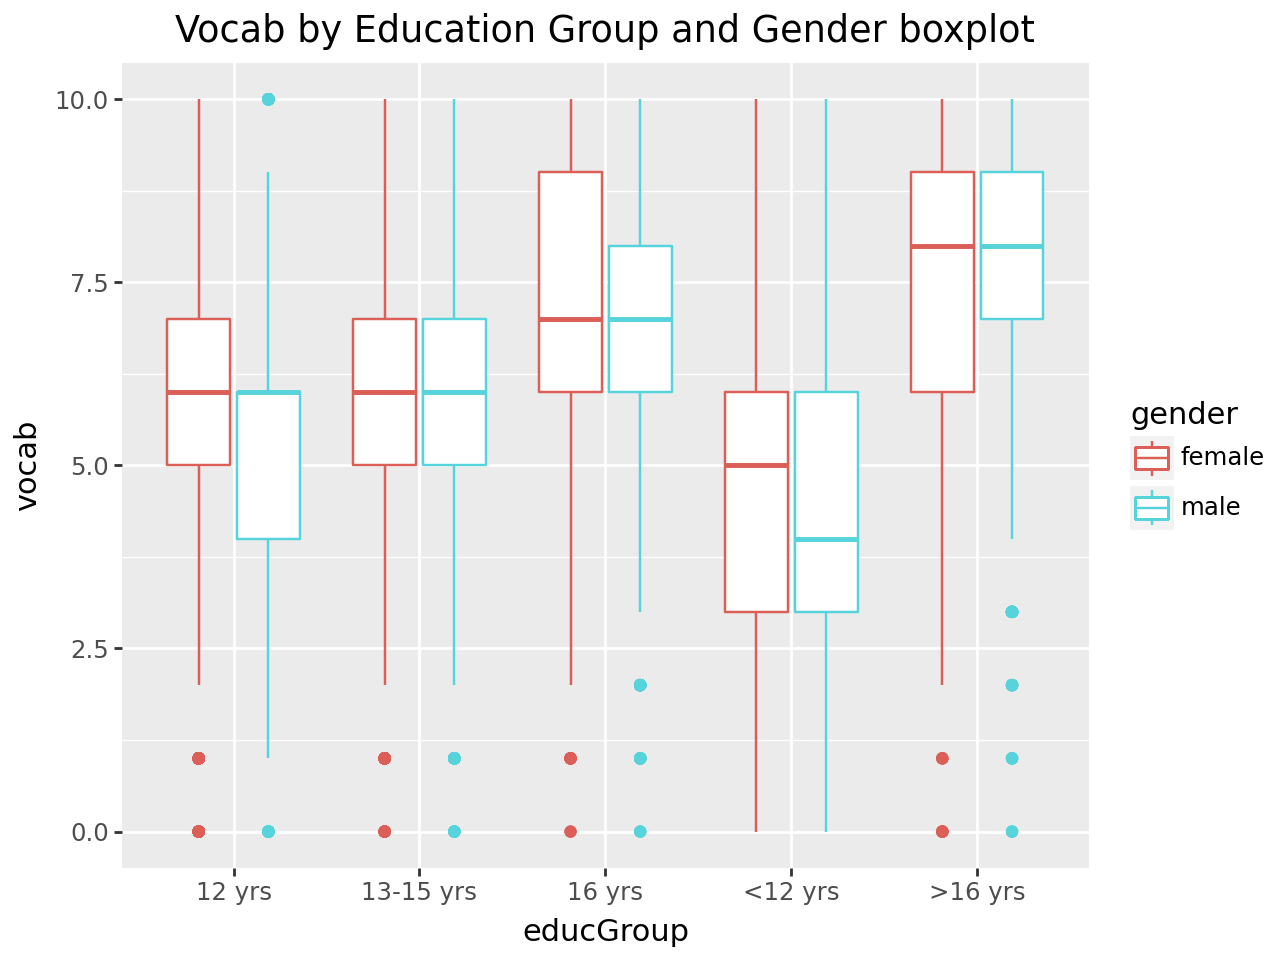

In [17]:
boxplot = (ggplot(df, aes(x='educGroup', y='vocab')) +
           geom_boxplot(aes(color='gender')) +
           labs(title='Vocab by Education Group and Gender boxplot'))
 
boxplot

Using facets, examine the relationship between `vocab` and `ageGroup`. You can drop year level `(Other)`. Are we getting dumber?

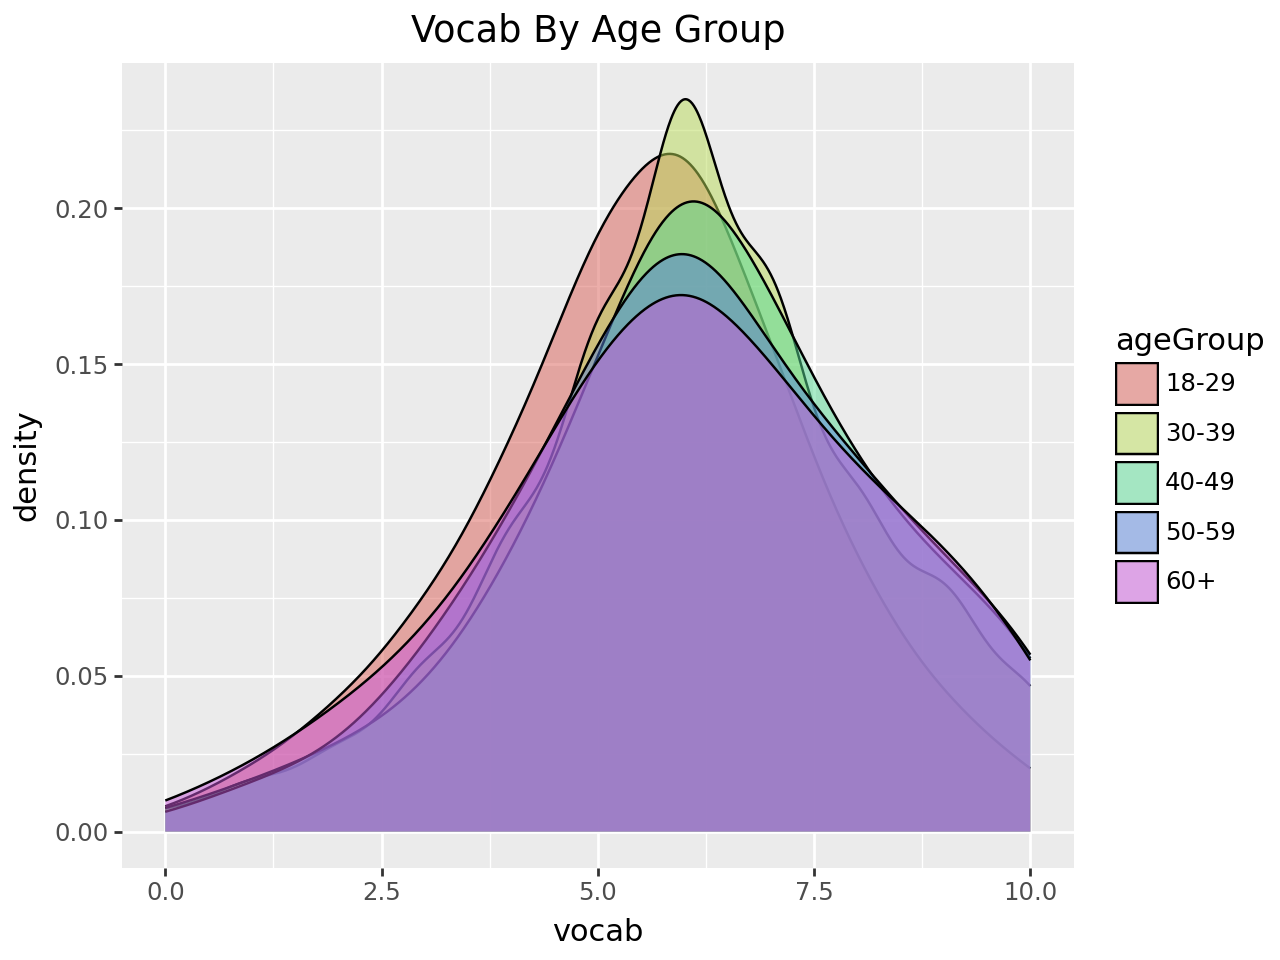

In [18]:
import pandas as pd
from plotnine import ggplot, aes, geom_density, facet_grid, labs, theme_minimal

# Assume df is your GSSvocab DataFrame.
# Drop the unwanted level "(Other)" from ageGroup.
df_subset = df[df['ageGroup']!='Other']

# Create the density plot faceted by ageGroup.
plot = (ggplot(df_subset, aes(x='vocab', fill='ageGroup')) +
    geom_density(adjust=2, alpha=0.5)+
    labs(title='Vocab By Age Group'))

plot

#Logistic Regression

Let's consider the Pima Indians Diabetes dataset from 1988:

In [19]:
import statsmodels.api as sm

# Load the Pima.tr2 dataset from the MASS package
pima_dataset = sm.datasets.get_rdataset("Pima.tr2", package="MASS")
df = pima_dataset.data

# Display the first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   npreg   300 non-null    int64  
 1   glu     300 non-null    int64  
 2   bp      287 non-null    float64
 3   skin    202 non-null    float64
 4   bmi     297 non-null    float64
 5   ped     300 non-null    float64
 6   age     300 non-null    int64  
 7   type    300 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 18.9+ KB


Note the missing data. We will learn about how to handle missing data towards the end of the course. For now, replace, the missing data in the design matrix X with the mean of the feature x_dot,j. 

In [20]:
# Create the design matrix X with an intercept column 
pima = pd.concat([pd.Series(1, index=df.index, name="intercept"), df], axis=1)

# Replace missing values in each column with the mean of that column
means = {'bp':pima['bp'].mean(), 'skin':pima['skin'].mean(), 'bmi':pima['bmi'].mean()}
pima = pima.fillna(means)

pima
#pima.info()

intercept  npreg  glu         bp       skin   bmi    ped  age type
0            1      5   86  68.000000  28.000000  30.2  0.364   24   No
1            1      7  195  70.000000  33.000000  25.1  0.163   55  Yes
2            1      5   77  82.000000  41.000000  35.8  0.156   35   No
3            1      0  165  76.000000  43.000000  47.9  0.259   26   No
4            1      0  107  60.000000  25.000000  26.4  0.133   23   No
..         ...    ...  ...        ...        ...   ...    ...  ...  ...
295          1      0  125  68.000000  29.153465  24.7  0.206   21   No
296          1      6   92  92.000000  29.153465  19.9  0.188   28   No
297          1      3  141  72.320557  29.153465  30.0  0.761   27  Yes
298          1      0   73  72.320557  29.153465  21.1  0.342   25   No
299          1      2  129  84.000000  29.153465  28.0  0.284   27   No

[300 rows x 9 columns]

Now let's fit a log-odds linear model of y=1 (type is "diabetic") on just the `glu` variable. Import minimize from scipy.optimize to fit the model.

In [21]:
import numpy as np
from scipy.optimize import minimize

y = pima['type'].map({'Yes':1, 'No':0}).astype('int').values
X = pima['glu'].values.astype('int')

# Define the negative log-likelihood function for logistic regression
def neg_loglik(beta):
    beta0, beta1 = beta             #tuple unpack the betas
    pred = beta0 + beta1*X          #calculate the predicted value
    prob = 1 / (1+np.exp(-pred))    #calculate the probability that type=1

    #return the negative log-likelihood 
    log_lik = np.sum(y*np.log(prob) + (1-y)*np.log(1-prob))
    return -log_lik

# Use minimize from SciPy to optimize the negative log-likelihood
result = minimize(neg_loglik, [0,0])
print(result)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 156.73598009145098
        x: [-5.835e+00  4.111e-02]
      nit: 11
      jac: [ 1.907e-06  5.226e-04]
 hess_inv: [[ 3.548e-04 -5.100e-06]
            [-5.100e-06  1.209e-06]]
     nfev: 51
     njev: 17


Extra Credit(+5): write a `fit_logistic_regression` function which takes in X, y and returns b which uses the optimization routine.

Run a logistic regression of y=1 (type is "diabetic") on just the `glu` variable using sm from statsmodels.api and report b_0, b_1.

In [22]:
import statsmodels.api as sm

# Add a constant column for the intercept
X_df=sm.add_constant(X)

# Fit the logistic regression model using y as the response and glu as the predictor
model = sm.Logit(endog = y, exog = X_df)
results = model.fit()

# Extract the coefficients: b0 (intercept) and b1 (for glu)
b0, b1 = results.params

print("b0 (Intercept):", b0)
print("b1 (glu):", b1)

Optimization terminated successfully.
         Current function value: 0.522453
         Iterations 6
b0 (Intercept): -5.835259494801024
b1 (glu): 0.04111200273150749


Comment on how close the results from Statsmodels built in function was to your optimization call.

Answer: The two functions returned essentially the same values. 

Interpret the value of b_1 from Statsmodels smf module.

Answer: For a one unit increase in GLU, the log-odds (that type is equal to 1) is predicted to increase by the value of b_1. 

Interpret the value of b_0 from Statsmodels smf module.

Answer: This is the baseline value. If GLU were to be 0, this represents the log-odds of type being equal to 1. 

Plot the probability of y=1 from the minimum value of `glu` to the maximum value of `glu`.

Optimization terminated successfully.
         Current function value: 0.648955
         Iterations 4


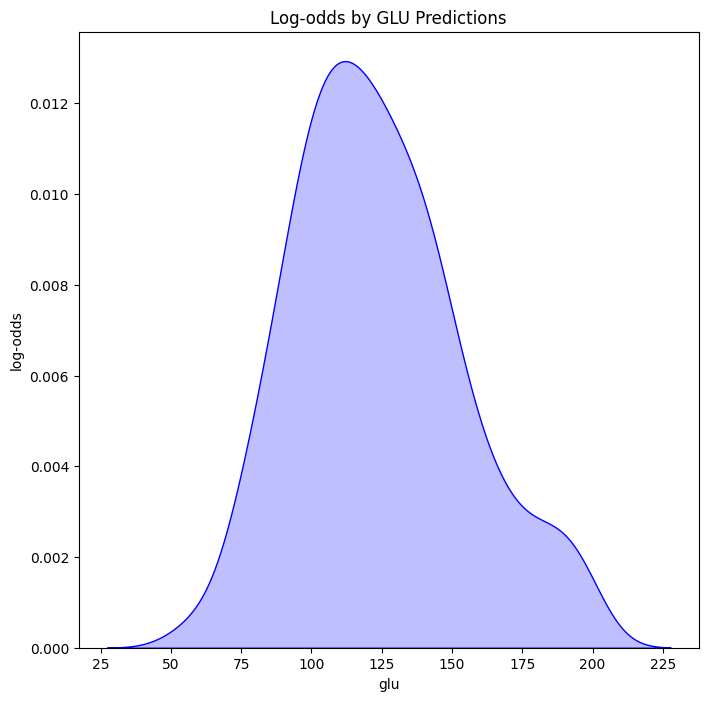

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with the glu values sorted from min to max
X.sort()

# Add the constant column so that newdata matches the model's predictors
X_sort=sm.add_constant(X)

# Compute the predicted probabilities for y = 1 using the fitted model
model = sm.Logit(endog = y, exog = X_sort)
results = model.fit()

# Extract the coefficients: b0 (intercept) and b1 (for glu)
b0, b1 = results.params

y_pred = pd.DataFrame({
    'x': X,
    'pred': (b0 + b1 * X)
})

# Plot the predicted probability curve 
plt.figure(figsize=(8,8))
sns.kdeplot(data=y_pred, x="x", fill=True, color="blue")
plt.xlabel("glu")
plt.ylabel("log-odds")
plt.title("Log-odds by GLU Predictions")
plt.savefig("pred_prob_curve.pdf")
plt.show()

Run a logistic regression of y=1 (type is "diabetic") on all variables using statsmodels sm module and report the b vector.

In [24]:
# Grab all the columns except 'type'
X = pima.iloc[:,:8]

# Fit the logistic regression model using y as the response and glu as the predictor
model = sm.Logit(y, X).fit()

# Report the estimated coefficients (b vector)
print("Coefficient vector (b):")
print(model.params)

Optimization terminated successfully.
         Current function value: 0.474728
         Iterations 6
Coefficient vector (b):
intercept   -8.867074
npreg        0.127339
glu          0.037081
bp          -0.007802
skin         0.000945
bmi          0.082250
ped          1.268481
age          0.009437
dtype: float64


Predict the probability of diabetes for someone with a blood sugar of 150.

In [25]:
import pandas as pd

# Compute means for the other variables
predictor_means = model.params

# Create a new data point, using 150 for glu and the means for the others
glu_150 = pd.DataFrame({
    'intercept': 1,
    'npreg': [predictor_means['npreg']],
    'glu': 150,
    'bp': [predictor_means['bp']],
    'skin': [predictor_means['skin']],
    'bmi': [predictor_means['bmi']],
    'ped': [predictor_means['ped']],
    'age': [predictor_means['age']]
})

# Predict using the fitted model
log_odd = model.predict(glu_150)[0]
odd = np.exp(log_odd)
pred_prob = odd / (1+odd)

print("Predicted probability of diabetes for blood sugar 150:", pred_prob)

Predicted probability of diabetes for blood sugar 150: 0.5394326631810259


For 100 people with blood sugar of 150, what is the probability more than 75 of them have diabetes? (You may need to review 241 to do this problem).

In [26]:
from scipy.stats import binom

# Compute the probability that more than 75 of them have diabetes.
# This is: 1 - P(X <= 75)
prob = 1 - binom.cdf(k=74, n=150, p=pred_prob)

print("Probability that more than 75 out of 100 people have diabetes:", prob)

Probability that more than 75 out of 100 people have diabetes: 0.8532934134632262


Plot the in-sample log-odds predictions (y-axis) versus the real response values (x-axis).

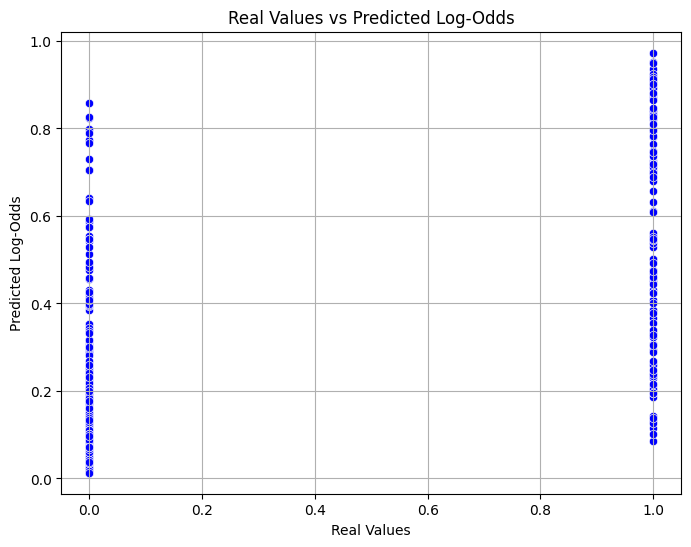

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Compute the in-sample log-odds predictions (linear predictor)
log_odds_predictions = model.predict(X)

# Create a DataFrame that holds the real responses and the log-odds predictions
df_plot = pd.DataFrame({
    'Real_Response': y,           # actual binary response values (0 or 1)
    'Predicted_LogOdds': log_odds_predictions
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_LogOdds', color='Blue')
plt.xlabel("Real Values")
plt.ylabel("Predicted Log-Odds")
plt.title("Real Values vs Predicted Log-Odds")
plt.grid(True)
plt.show()

Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

In [28]:
# Compute predicted probabilities using your fitted logistic regression model.
# X is your original design matrix with the intercept
log_odd = model.predict(X)
odd = np.exp(log_odd)
predicted_probs = odd / (1+odd)

# Create a DataFrame that holds the actual binary responses and the predicted probabilities.
df_plot = pd.DataFrame({
    'Real_Response': y,                 # Actual response values (0 or 1)
    'Predicted_Probability': predicted_probs
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='blue')
plt.xlabel('Real Response')
plt.ylabel('Predicted Probability')
plt.title('Real vs Predicted Probabilities')
plt.grid(True)
plt.show()


Comment on how well you think the logistic regression performed in-sample.

Answer: Upon visual inspection, the model doesn't seem to fit the data well in-sample. On the right (true 1s) there is a cluster near the top. This is expected as these points are predicted to be mostly ones. However, on the left side (true 0s), near the bottom, you would expect around half the values to be ones. Instead, there is a cluster of 0s which shows a possible poor fit.

Calculate the in-sample Brier score.

In [29]:
import numpy as np

# Compute the in-sample Brier score
# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
brier_score = np.mean(1/len(y) * np.sum((y-predicted_probs)**2))

print("In-sample Brier score:", brier_score)

In-sample Brier score: 0.25269463065565645


Calculate the in-sample log-scoring rule.

In [30]:
import numpy as np

# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the negative average log-likelihood
# Also known as the log scoring rule
log_score = -np.mean(
    np.sum(y * np.log(predicted_probs + epsilon) + (1-y) * np.log(1-predicted_probs + epsilon))
)

print("In-sample log scoring rule:", log_score)

In-sample log scoring rule: 209.23626064317386


Run a probit regression of y=1 (type is "diabetic") on all variables and report the b vector.

In [31]:
# Grab all the columns except 'type'
X = pima.iloc[:,:8]

# Fit the probit regression model using sm.Probit
model = sm.Probit(endog=y, exog=X).fit()

# Report the estimated coefficient vector (b)
print("Coefficient vector (b):")
print(model.params)

Optimization terminated successfully.
         Current function value: 0.472149
         Iterations 6
Coefficient vector (b):
intercept   -5.362714
npreg        0.075344
glu          0.022262
bp          -0.004295
skin         0.000222
bmi          0.050129
ped          0.741756
age          0.005967
dtype: float64


Does the weight estimates here in the probit fit have different signs than the weight estimates in the logistic fit? What does that mean?

Answer: While the values are different, the signs are the same. This means that the correlation between the variables and the response are in a specifitc direction regardless of fitting to a logistic or a normal sigmoid function. 

Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

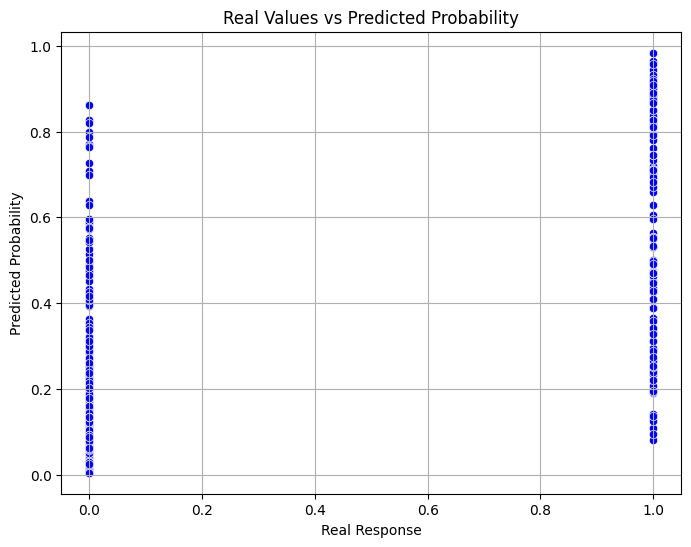

In [32]:
# Compute predicted probabilities using your fitted logistic regression model.
probit_probs = model.predict(X)  # X is your original design matrix with the intercept

# Create a DataFrame that holds the actual binary responses and the predicted probabilities.
df_plot = pd.DataFrame({
    'Real_Response': y,                 # Actual response values (0 or 1)
    'Predicted_Probability': probit_probs
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='blue')
plt.xlabel('Real Response')
plt.ylabel('Predicted Probability')
plt.title('Real Values vs Predicted Probability')
plt.grid(True)
plt.show()

Calculate the in-sample Brier score.

In [33]:
import numpy as np

# Compute the in-sample Brier score
# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
Probit_brier_score = np.mean(1/len(y) * np.sum((y-probit_probs)**2))

print("In-sample Brier score:", Probit_brier_score)

In-sample Brier score: 0.15821153000656532


Calculate the in-sample log-scoring rule.

In [34]:
import numpy as np

# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the negative average log-likelihood
# Also known as the log scoring rule
Probit_log_score = -np.mean(
   np.sum(y * np.log(probit_probs + epsilon) + (1-y) * np.log(1-probit_probs + epsilon))
)

print("In-sample log scoring rule:", Probit_log_score)

In-sample log scoring rule: 141.6447690138059


Which model did better in-sample?

Answer: The probit model seems to fit the data better in-sample. Its Brier score of 0.15 is significantly better than the 0.25 from the Logit model. 

Compare both models oos using the Brier score and a test set with 1/3 of the data.

In [37]:
from sklearn.model_selection import train_test_split

# Grab all the columns except 'type'
X = pima.iloc[:,:8]
y = pima['type'].map({'Yes':1, 'No':0}).astype('int').values

# Split the data: 2/3 training, 1/3 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42
)

# Fit the logistic regression (logit) model on the training set
logit_model = sm.Logit(endog=y_train, exog=X_train).fit()

# Fit the probit model on the training set
probit_model = sm.Probit(endog=y_train, exog=X_train).fit()

# Predict probabilities on the test set for both models
logit_preds = logit_model.predict(X_test)
probit_preds = probit_model.predict(X_test)

# Calculate the out-of-sample Brier score for each model
# Brier Score = mean( (actual - predicted)^2 )
brier_logit = np.mean((y_test-logit_preds)**2)
brier_probit = np.mean((y_test-probit_preds)**2)

print("Out-of-sample Brier Score (Logit):", brier_logit)
print("Out-of-sample Brier Score (Probit):", brier_probit)

Optimization terminated successfully.
         Current function value: 0.486036
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.484028
         Iterations 6
Out-of-sample Brier Score (Logit): 0.156297314655836
Out-of-sample Brier Score (Probit): 0.15498131514155358


Which model did better oos?

Answer: They both did about the same for most practical purposes. The probit model did ever so slightly better. 